CSV not found at: population_by_country.csv
Creating a sample dataset automatically...
✅ Sample dataset saved to: C:\Users\Lenovo\population_by_country.csv

--- Data Preprocessing ---
Initial shape: (10, 4)
After dropping NAs: (10, 4)

Summary statistics:
          Population          Area
count  1.000000e+01  1.000000e+01
mean   4.481678e+08  5.415394e+06
std    5.039809e+08  5.581199e+06
min    1.289328e+08  1.475700e+05
25%    1.762625e+08  1.168968e+06
50%    2.167259e+08  2.625819e+06
75%    3.173012e+08  9.326662e+06
max    1.402112e+09  1.709824e+07

Correlation Matrix:
             Population      Area
Population    1.000000  0.099508
Area          0.099508  1.000000


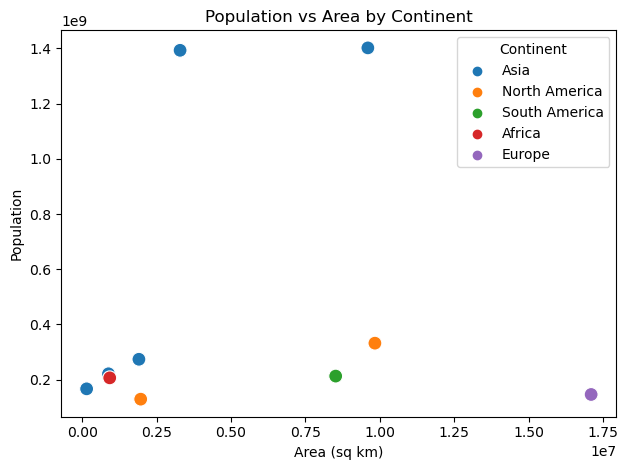

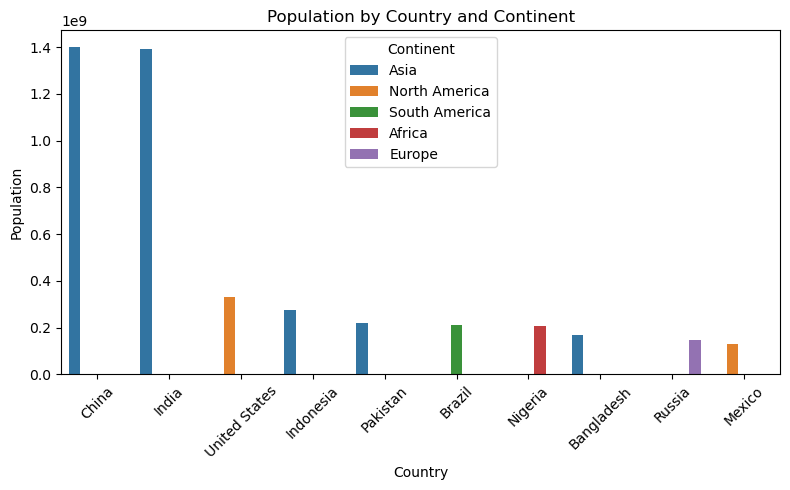

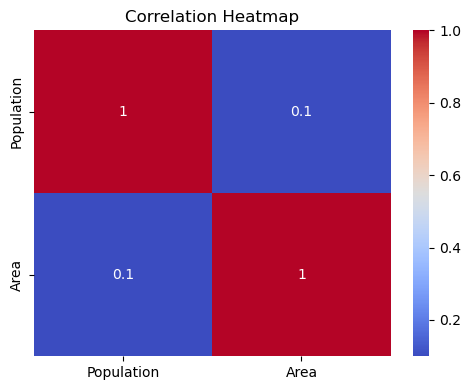

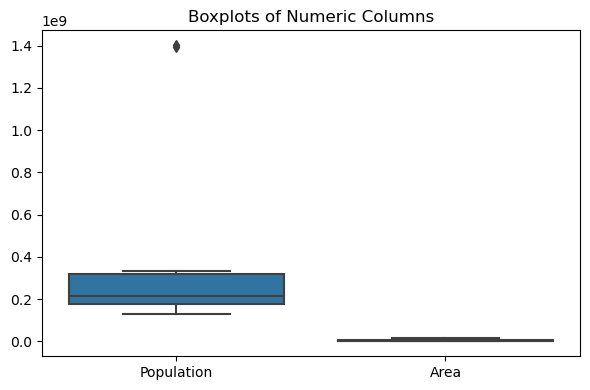


--- Statistical Moments for Population ---
Mean: 448167800.7000
Standard Deviation: 478118284.7326
Skewness: 1.4495
Excess Kurtosis: 0.1800

✅ Results written to 'statistical_summary.txt'


In [7]:


import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# --------------------------------------------
# 1. Load Data or Create Sample Dataset
# --------------------------------------------
def load_data(csv_path: str = "population_by_country.csv") -> pd.DataFrame:
    """Load the CSV file. If not found, create a sample dataset automatically."""
    if not os.path.exists(csv_path):
        print(f"CSV not found at: {csv_path}")
        print("Creating a sample dataset automatically...")

        data = {
            "Country": [
                "China", "India", "United States", "Indonesia", "Pakistan",
                "Brazil", "Nigeria", "Bangladesh", "Russia", "Mexico"
            ],
            "Population": [1402112000, 1393409038, 331893745, 273523621, 220892331,
                           212559409, 206139587, 166303498, 145912025, 128932753],
            "Area": [9596961, 3287263, 9833517, 1904569, 881913,
                     8515767, 923768, 147570, 17098242, 1964375],
            "Continent": [
                "Asia", "Asia", "North America", "Asia", "Asia",
                "South America", "Africa", "Asia", "Europe", "North America"
            ]
        }
        df = pd.DataFrame(data)
        df.to_csv(csv_path, index=False)
        print(f"✅ Sample dataset saved to: {os.path.abspath(csv_path)}")
    else:
        df = pd.read_csv(csv_path)
        print(f"✅ Dataset loaded from: {os.path.abspath(csv_path)}")

    return df


# --------------------------------------------
# 2. Preprocessing
# --------------------------------------------
def preprocessing(df: pd.DataFrame) -> pd.DataFrame:
    """Clean data and compute summary stats."""
    print("\n--- Data Preprocessing ---")
    print(f"Initial shape: {df.shape}")

    df = df.dropna()
    print(f"After dropping NAs: {df.shape}")

    numeric_cols = df.select_dtypes(include=np.number).columns
    print("\nSummary statistics:\n", df[numeric_cols].describe())

    correlation = df[numeric_cols].corr()
    print("\nCorrelation Matrix:\n", correlation)

    return df


# --------------------------------------------
# 3. Visualisation Functions
# --------------------------------------------
def plot_relational_plot(df: pd.DataFrame):
    """Create relational plot (Population vs Area)."""
    sns.scatterplot(data=df, x="Area", y="Population", hue="Continent", s=100)
    plt.title("Population vs Area by Continent")
    plt.xlabel("Area (sq km)")
    plt.ylabel("Population")
    plt.tight_layout()
    plt.savefig("relational_plot.png")
    plt.show()


def plot_categorical_plot(df: pd.DataFrame):
    """Create categorical plots."""
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, x="Country", y="Population", hue="Continent")
    plt.title("Population by Country and Continent")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("categorical_plot.png")
    plt.show()


def plot_statistical_plot(df: pd.DataFrame):
    """Create statistical plots: correlation heatmap + boxplots."""
    plt.figure(figsize=(5, 4))
    sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.savefig("statistical_plot_heatmap.png")
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df.select_dtypes(include=np.number))
    plt.title("Boxplots of Numeric Columns")
    plt.tight_layout()
    plt.savefig("statistical_plot_boxplot.png")
    plt.show()


# --------------------------------------------
# 4. Statistical Analysis (Moments)
# --------------------------------------------
def statistical_analysis(df: pd.DataFrame, col: str) -> dict:
    """Compute 4 main statistical moments for a numeric column."""
    data = df[col]
    moments = {
        "Mean": np.mean(data),
        "Standard Deviation": np.std(data),
        "Skewness": skew(data),
        "Excess Kurtosis": kurtosis(data)
    }
    print(f"\n--- Statistical Moments for {col} ---")
    for k, v in moments.items():
        print(f"{k}: {v:.4f}")
    return moments


# --------------------------------------------
# 5. Writing Results
# --------------------------------------------
def writing(moments: dict, col: str):
    """Save results to a text file."""
    with open("statistical_summary.txt", "w") as f:
        f.write(f"Statistical Analysis Summary for '{col}'\n")
        f.write("=" * 45 + "\n")
        for k, v in moments.items():
            f.write(f"{k}: {v:.4f}\n")
    print("\n✅ Results written to 'statistical_summary.txt'")


# --------------------------------------------
# 6. Main Function
# --------------------------------------------
def main():
    df = load_data()
    df = preprocessing(df)

    plot_relational_plot(df)
    plot_categorical_plot(df)
    plot_statistical_plot(df)

    col = "Population"
    moments = statistical_analysis(df, col)
    writing(moments, col)


# --------------------------------------------
# 7. Entry Point
# --------------------------------------------
if __name__ == "__main__":
    main()
